Nouns identified: ['voice', 'ice', 'breaking', 'dress', 'uniform', 'cap', 'eye', 'sir', 'hurricane', 'power', 'lights', 'pounding', 'cylinders', 'pocketa', 'pocketa', 'ice', 'pilot', 'window', 'row', 'dials', 'auxiliary', 'auxiliary', 'strength', 'turret', 'strength', 'turret', 'crew', 'tasks', 'hydroplane', 'wife', 'seat', 'astonishment', 'woman', 'crowd', 'silence', 'roaring', 'storm', 'years', 'remote', 'airways', 'mind', 'days', 'car', 'front', 'building', 'wife', 'hair', 'shoes', 'hair', 'shoes', 'mirror', 'bag', 'car', 'man', 'engine', 'gloves', 'gloves', 'pocket', 'gloves', 'building', 'light', 'brother', 'cop', 'light', 'gloves', 'streets', 'time', 'hospital', 'way', 'parking', 'lot', 'millionaire', 'banker', 'nurse', 'gloves', 'case', 'specialists', 'door', 'corridor', 'devil', 'time', 'millionaire', 'banker', 'friend', 'Obstreosis', 'tract', 'look', 'operating', 'room', 'introductions', 'book', 'streptothricosis', 'hands', 'performance']


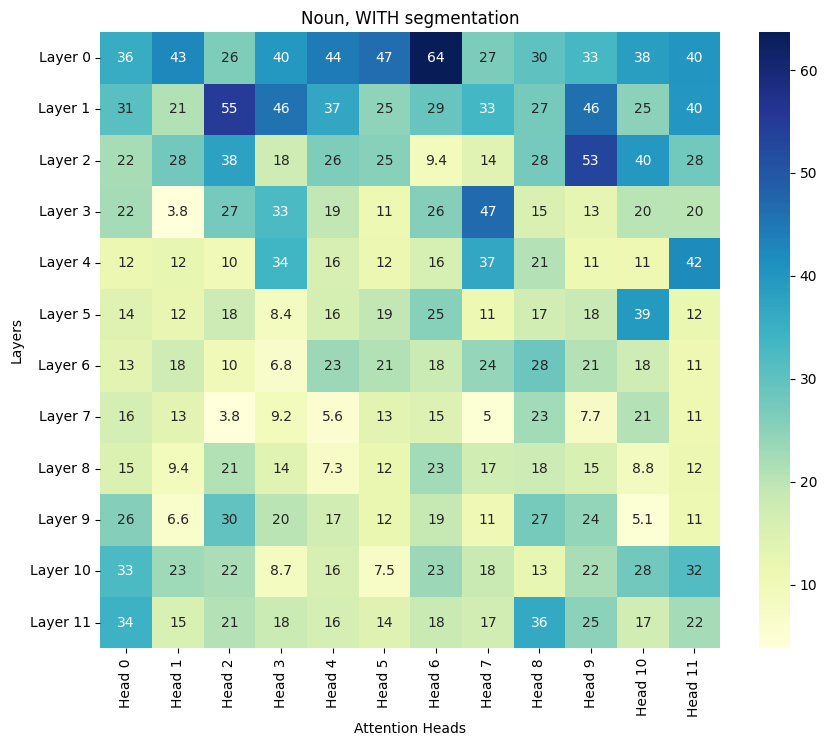

In [76]:
## WITH CONTEXT, NOUN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# spaCy is used to identify all the linguistic features (e.g. nouns) in the input text
# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the nouns in the input story using spaCy
doc = nlp(story[143:])
nouns = [token.text for token in doc if token.pos_ == 'NOUN' and not token.is_punct]

# Print identified nouns
print(f"Nouns identified: {nouns}")

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']

# Tokenize the identified nouns
token_positions = []
for noun in nouns:
    tokenized_noun = tokenizer.tokenize(noun)
    for subword in tokenized_noun:
        token_index = tokenizer.convert_tokens_to_ids(subword)
        positions = (input_ids == token_index).nonzero(as_tuple=True)[1].tolist()
        token_positions.extend(positions)

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No noun tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all noun tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all noun tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Plotting the aggregated attention heatmap for all nouns
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])

plt.title(f"Noun, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()

Nouns identified: ['voice', 'ice', 'breaking', 'dress', 'uniform', 'cap', 'eye', 'sir', 'hurricane', 'power', 'lights', 'pounding', 'cylinders', 'pocketa', 'pocketa', 'ice', 'pilot', 'window', 'row', 'dials', 'auxiliary', 'auxiliary', 'strength', 'turret', 'strength', 'turret', 'crew', 'tasks', 'hydroplane', 'wife', 'seat', 'astonishment', 'woman', 'crowd', 'silence', 'roaring', 'storm', 'years', 'remote', 'airways', 'mind', 'days', 'car', 'front', 'building', 'wife', 'hair', 'shoes', 'hair', 'shoes', 'mirror', 'bag', 'car', 'man', 'engine', 'gloves', 'gloves', 'pocket', 'gloves', 'building', 'light', 'brother', 'cop', 'light', 'gloves', 'streets', 'time', 'hospital', 'way', 'parking', 'lot', 'millionaire', 'banker', 'nurse', 'gloves', 'case', 'specialists', 'door', 'corridor', 'devil', 'time', 'millionaire', 'banker', 'friend', 'Obstreosis', 'tract', 'look', 'operating', 'room', 'introductions', 'book', 'streptothricosis', 'hands', 'performance']


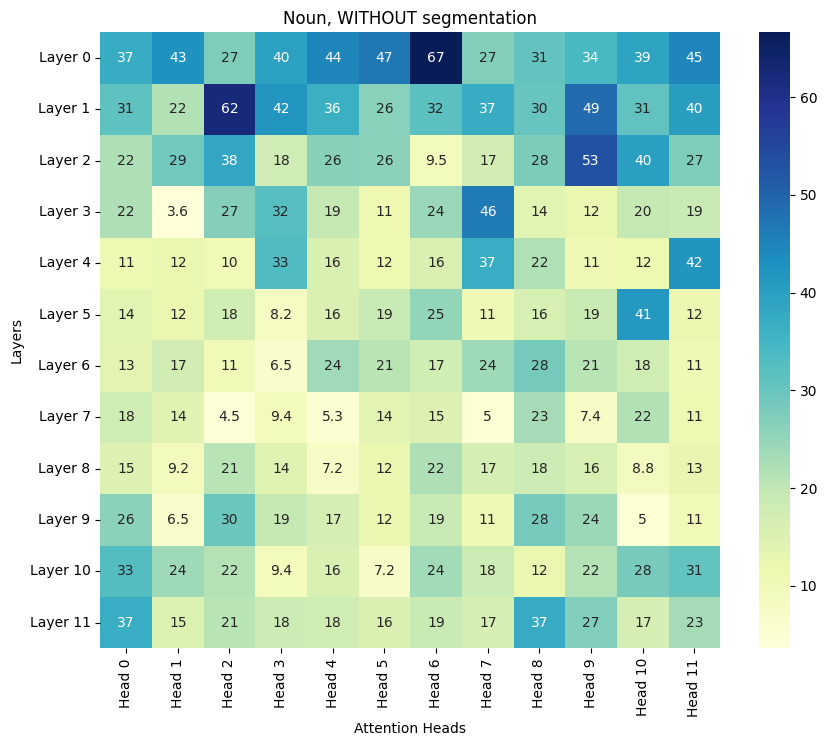

In [77]:
## WITHOUT CONTEXT, NOUN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# spaCy is used to identify all the linguistic features (e.g. nouns) in the input text
# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the nouns in the input story using spaCy
doc = nlp(story)
nouns = [token.text for token in doc if token.pos_ == 'NOUN' and not token.is_punct]

# Print identified nouns
print(f"Nouns identified: {nouns}")

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']

# Tokenize the identified nouns
token_positions = []
for noun in nouns:
    tokenized_noun = tokenizer.tokenize(noun)
    for subword in tokenized_noun:
        token_index = tokenizer.convert_tokens_to_ids(subword)
        positions = (input_ids == token_index).nonzero(as_tuple=True)[1].tolist()
        token_positions.extend(positions)

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No noun tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all noun tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all noun tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Plotting the aggregated attention heatmap for all nouns
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])

plt.title(f"Noun, WITHOUT segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Coordinating conjunctions identified: ['and', 'and', 'and', 'but', 'and', 'and', 'and', 'and', 'and', 'and', 'but', 'and', 'and', 'and', 'and']


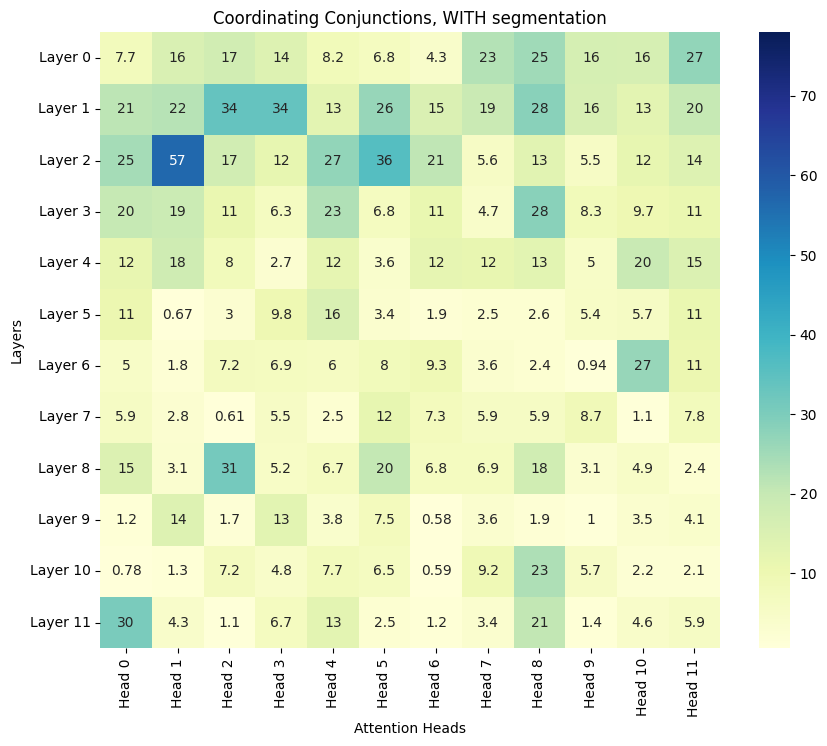

In [93]:
## Coordinating conjunction (CCONJ), with context
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the coordinating conjunctions (CCONJ) in the input story using spaCy
doc = nlp(story[143:])
cconj = [token.text for token in doc if token.pos_ == 'CCONJ' and not token.is_punct]

# Print identified coordinating conjunctions
print(f"Coordinating conjunctions identified: {cconj}")

# Add a space in front of each coordinating conjunction to match the tokenization
cconj_with_space = [" " + conj for conj in cconj]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of coordinating conjunctions
token_positions = []

for conj in cconj_with_space:
    tokenized_conj = tokenizer.tokenize(conj)
    found = False
    for i in range(len(tokens) - len(tokenized_conj) + 1):
        # Check if the tokenized conjunction matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_conj)] == tokenized_conj:
            token_positions.extend(range(i, i+len(tokenized_conj)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{conj}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No coordinating conjunction tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all coordinating conjunction tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all coordinating conjunction tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 78  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all coordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)],
            vmin=vmin, vmax=vmax)  # Apply the scale to the heatmap

plt.title(f"Coordinating Conjunctions, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Coordinating conjunctions identified: ['and', 'and', 'and', 'but', 'and', 'and', 'and', 'and', 'and', 'and', 'but', 'and', 'and', 'and', 'and']


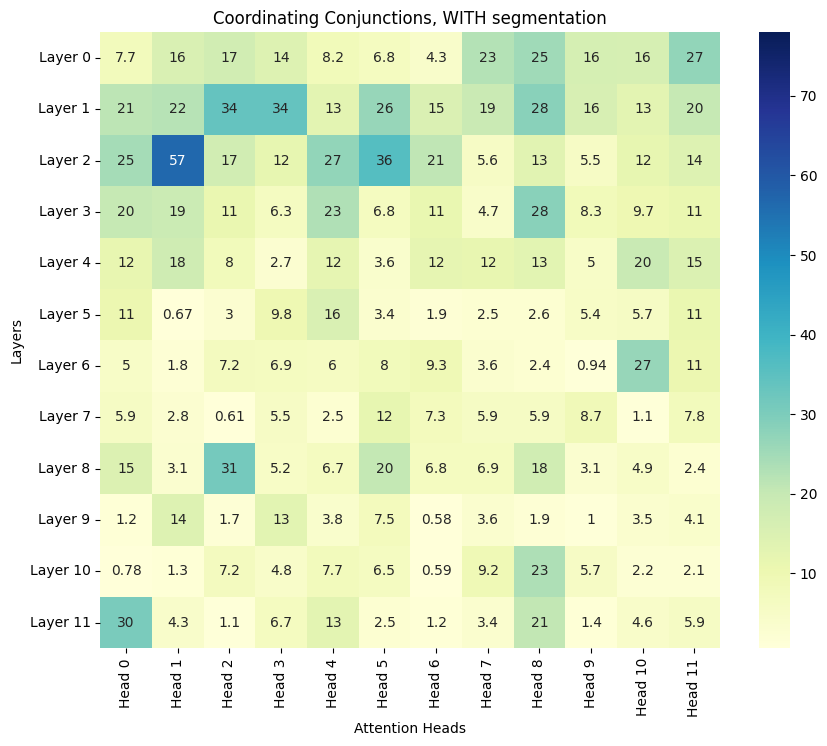

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the coordinating conjunctions (CCONJ) in the input story using spaCy
doc = nlp(story[143:])
cconj = [token.text for token in doc if token.pos_ == 'CCONJ' and not token.is_punct]

# Print identified coordinating conjunctions
print(f"Coordinating conjunctions identified: {cconj}")

# Add a space in front of each coordinating conjunction to match the tokenization
cconj_with_space = [" " + conj for conj in cconj]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of coordinating conjunctions
token_positions = []

for conj in cconj_with_space:
    tokenized_conj = tokenizer.tokenize(conj)
    found = False
    for i in range(len(tokens) - len(tokenized_conj) + 1):
        # Check if the tokenized conjunction matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_conj)] == tokenized_conj:
            token_positions.extend(range(i, i+len(tokenized_conj)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{conj}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No coordinating conjunction tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all coordinating conjunction tokens across all layers and heads,
# excluding attention directed to the first token (index 0)
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all coordinating conjunction tokens across all tokens in the sequence,
        # excluding attention directed to the first token (index 0)
        attention_values[layer] += attentions[layer][0, :, :, pos][:, 1:].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 78  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all coordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)],
            vmin=vmin, vmax=vmax)  # Apply the scale to the heatmap

plt.title(f"Coordinating Conjunctions, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Coordinating conjunctions identified: ['and', 'and', 'and', 'but', 'and', 'and', 'and', 'and', 'and', 'and', 'but', 'and', 'and', 'and', 'and']


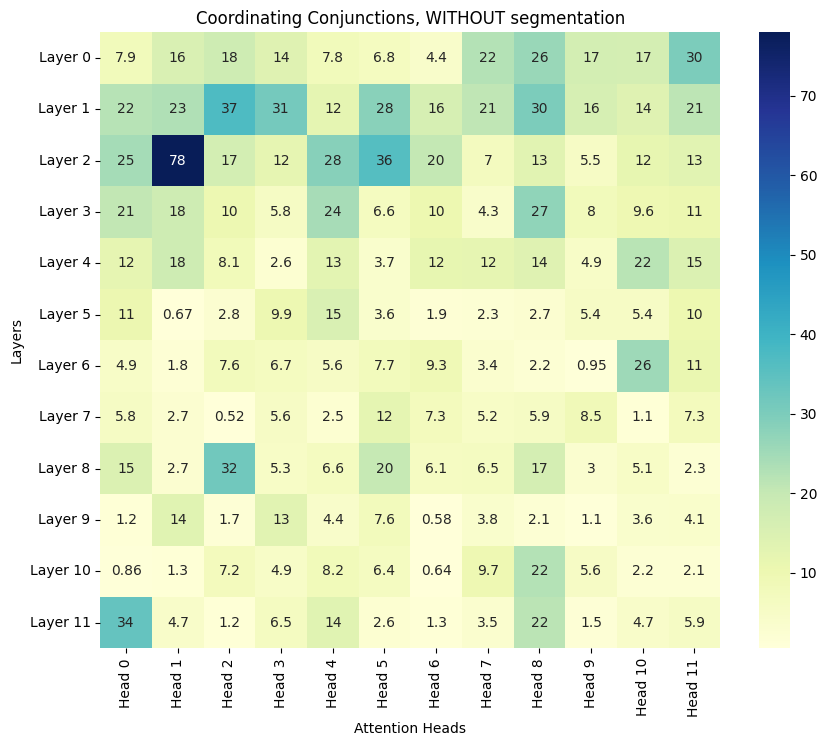

In [91]:
## Coordinating conjunction (CCONJ), without context
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the coordinating conjunctions (CCONJ) in the input story using spaCy
doc = nlp(story)
cconj = [token.text for token in doc if token.pos_ == 'CCONJ' and not token.is_punct]

# Print identified coordinating conjunctions
print(f"Coordinating conjunctions identified: {cconj}")

# Add a space in front of each coordinating conjunction to match the tokenization
cconj_with_space = [" " + conj for conj in cconj]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of coordinating conjunctions
token_positions = []

for conj in cconj_with_space:
    tokenized_conj = tokenizer.tokenize(conj)
    found = False
    for i in range(len(tokens) - len(tokenized_conj) + 1):
        # Check if the tokenized conjunction matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_conj)] == tokenized_conj:
            token_positions.extend(range(i, i+len(tokenized_conj)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{conj}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No coordinating conjunction tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all coordinating conjunction tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all coordinating conjunction tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 78  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all coordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)],
            vmin=vmin, vmax=vmax)  # Apply the scale to the heatmap

plt.title(f"Coordinating Conjunctions, WITHOUT segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()

In [80]:
print(story[143:])

led down rakishly over one cold gray eye. "We can't make it, sir. It's spoiling for a hurricane, if you ask me." "I'm not asking you, Lieutenant Berg," said the Commander. "Throw on the power lights! Rev her up to 8500! We're going through!" The pounding of the cylinders increased: ta-pocketa-pocketa-pocketa-pocketa-pocketa. The Commander stared at the ice forming on the pilot window. He walked over and twisted a row of complicated dials. "Switch on No. 8 auxiliary!" he shouted. "Switch on No. 8 auxiliary!" repeated Lieutenant Berg. "Full strength in No. 3 turret!" shouted the Commander. "Full strength in No. 3 turret!" The crew, bending to their various tasks in the huge, hurtling eight-engined Navy hydroplane, looked at each other and grinned. "The Old Man'll get us through," they said to one another. "The Old Man ain't afraid of hell!" ...
"Not so fast! You're driving too fast!" said Mrs. Smith. "What are you driving so fast for?"
"Hmm?" said Michael Smith. He looked at his wife, in

Subordinating conjunctions identified: ['with', 'if', 'where', 'while', 'Why', 'after', 'as']


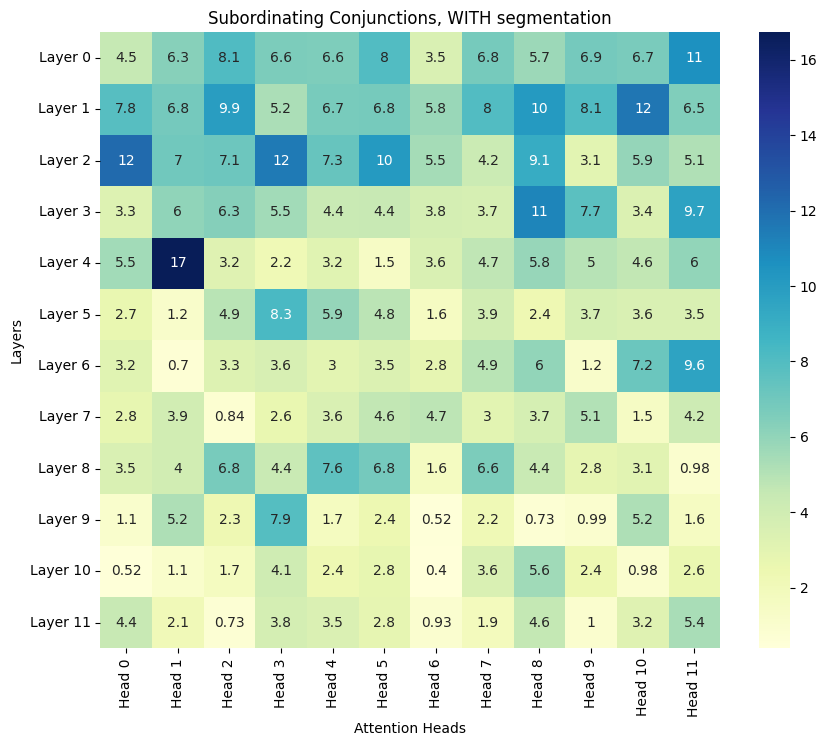

In [81]:
## Subordinating conjunction (CCONJ), with context
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the subordinating conjunctions (SCONJ) in the input story using spaCy
doc = nlp(story[143:])
sconj = [token.text for token in doc if token.pos_ == 'SCONJ' and not token.is_punct]

# Print identified subordinating conjunctions
print(f"Subordinating conjunctions identified: {sconj}")

# Add a space in front of each subordinating conjunction to match the tokenization
sconj_with_space = [" " + conj for conj in sconj]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of subordinating conjunctions
token_positions = []

for conj in sconj_with_space:
    tokenized_conj = tokenizer.tokenize(conj)
    found = False
    for i in range(len(tokens) - len(tokenized_conj) + 1):
        # Check if the tokenized conjunction matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_conj)] == tokenized_conj:
            token_positions.extend(range(i, i+len(tokenized_conj)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{conj}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No subordinating conjunction tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all subordinating conjunction tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all subordinating conjunction tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Plotting the aggregated attention heatmap for all subordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])

plt.title(f"Subordinating Conjunctions, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Subordinating conjunctions identified: ['with', 'if', 'where', 'while', 'Why', 'after', 'as']


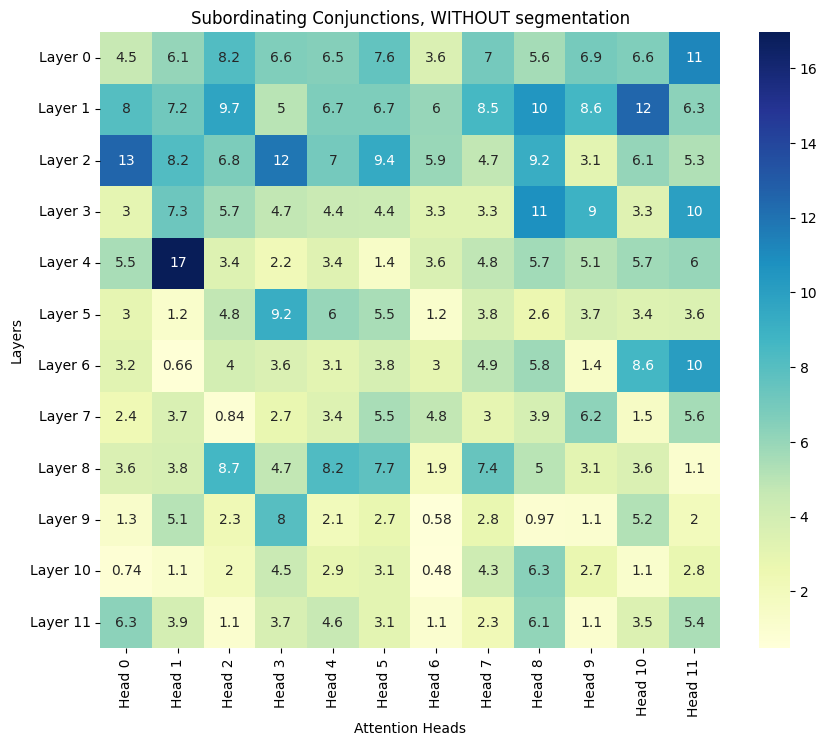

In [97]:
## Subordinating conjunction (CCONJ), without context
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the subordinating conjunctions (SCONJ) in the input story using spaCy
doc = nlp(story)
sconj = [token.text for token in doc if token.pos_ == 'SCONJ' and not token.is_punct]

# Print identified subordinating conjunctions
print(f"Subordinating conjunctions identified: {sconj}")

# Add a space in front of each subordinating conjunction to match the tokenization
sconj_with_space = [" " + conj for conj in sconj]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of subordinating conjunctions
token_positions = []

for conj in sconj_with_space:
    tokenized_conj = tokenizer.tokenize(conj)
    found = False
    for i in range(len(tokens) - len(tokenized_conj) + 1):
        # Check if the tokenized conjunction matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_conj)] == tokenized_conj:
            token_positions.extend(range(i, i+len(tokenized_conj)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{conj}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No subordinating conjunction tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all subordinating conjunction tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all subordinating conjunction tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Plotting the aggregated attention heatmap for all subordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])

plt.title(f"Subordinating Conjunctions, WITHOUT segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Adpositions identified: ['like', 'down', 'over', 'for', 'on', 'up', 'to', 'of', 'ta', 'at', 'on', 'of', 'on', 'on', 'in', 'in', 'to', 'in', 'at', 'to', 'of', 'for', 'at', 'in', 'beside', 'with', 'like', 'at', 'in', 'to', 'than', 'to', 'on', 'toward', 'in', 'of', 'through', 'in', 'of', 'in', 'of', 'up', 'of', 'over', 'in', 'of', 'into', 'through', 'out', 'of', 'in', 'out', 'on', 'into', 'on', 'to', 'off', 'up', 'on', 'around', 'for', 'past', 'on', 'to', 'from', 'from', 'over', 'down', 'out', 'with', 'of', 'of', 'at', 'In', 'on', 'in']


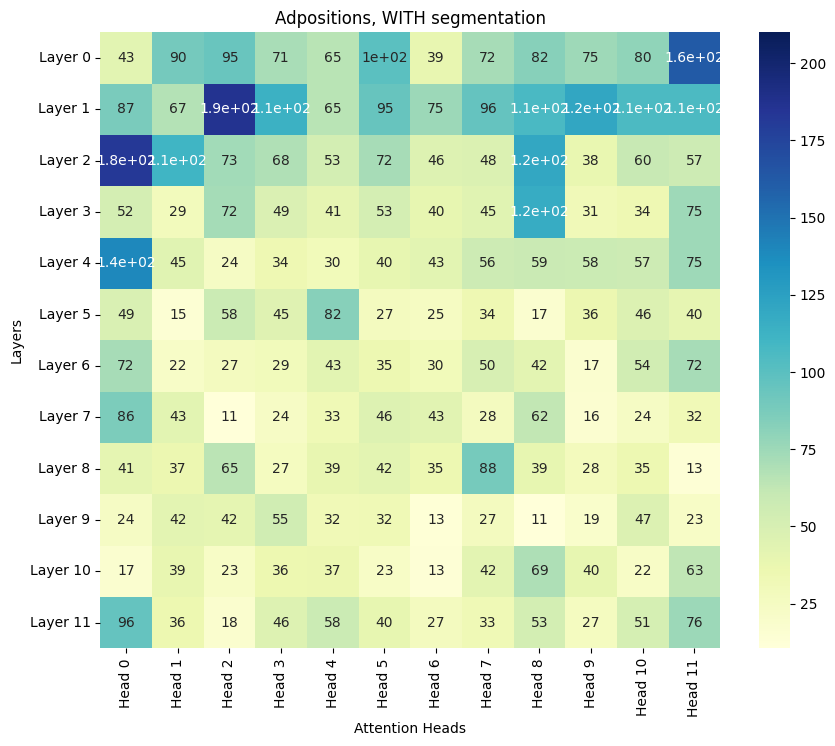

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the adpositions (ADP) in the input story using spaCy
doc = nlp(story[143:])
adpositions = [token.text for token in doc if token.pos_ == 'ADP' and not token.is_punct]

# Print identified adpositions
print(f"Adpositions identified: {adpositions}")

# Add a space in front of each adposition to match the tokenization
adpositions_with_space = [" " + adp for adp in adpositions]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of adpositions
token_positions = []

for adp in adpositions_with_space:
    tokenized_adp = tokenizer.tokenize(adp)
    found = False
    for i in range(len(tokens) - len(tokenized_adp) + 1):
        # Check if the tokenized adposition matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_adp)] == tokenized_adp:
            token_positions.extend(range(i, i+len(tokenized_adp)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{adp}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No adposition tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all adposition tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all adposition tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 210  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all coordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)],
            vmin=vmin, vmax=vmax)  # Apply the scale to the heatmap

plt.title(f"Adpositions, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Adpositions identified: ['like', 'down', 'over', 'for', 'on', 'up', 'to', 'of', 'ta', 'at', 'on', 'of', 'on', 'on', 'in', 'in', 'to', 'in', 'at', 'to', 'of', 'for', 'at', 'in', 'beside', 'with', 'like', 'at', 'in', 'to', 'than', 'to', 'on', 'toward', 'in', 'of', 'through', 'in', 'of', 'in', 'of', 'up', 'of', 'over', 'in', 'of', 'into', 'through', 'out', 'of', 'in', 'out', 'on', 'into', 'on', 'to', 'off', 'up', 'on', 'around', 'for', 'past', 'on', 'to', 'from', 'from', 'over', 'down', 'out', 'with', 'of', 'of', 'at', 'In', 'on', 'in']


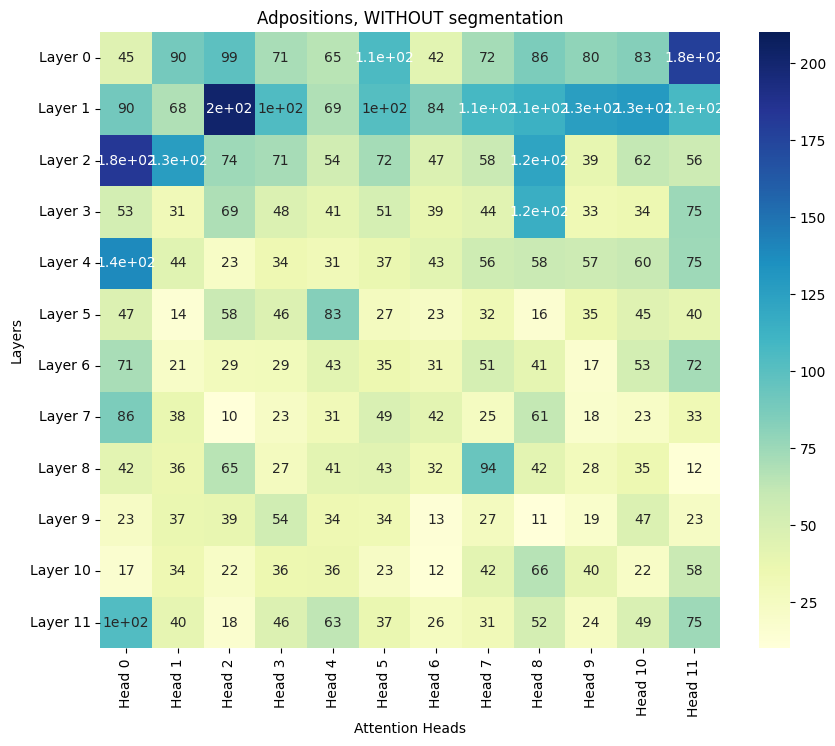

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the adpositions (ADP) in the input story using spaCy
doc = nlp(story)
adpositions = [token.text for token in doc if token.pos_ == 'ADP' and not token.is_punct]

# Print identified adpositions
print(f"Adpositions identified: {adpositions}")

# Add a space in front of each adposition to match the tokenization
adpositions_with_space = [" " + adp for adp in adpositions]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of adpositions
token_positions = []

for adp in adpositions_with_space:
    tokenized_adp = tokenizer.tokenize(adp)
    found = False
    for i in range(len(tokens) - len(tokenized_adp) + 1):
        # Check if the tokenized adposition matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_adp)] == tokenized_adp:
            token_positions.extend(range(i, i+len(tokenized_adp)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{adp}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No adposition tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all adposition tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all adposition tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 210  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all coordinating conjunctions
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)],
            vmin=vmin, vmax=vmax)  # Apply the scale to the heatmap

plt.title(f"Adpositions, WITHOUT segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Particle identified: ['through', 'heavily', 'rakishly', 'through', 'over', 'through', 'so', 'fast', 'too', 'fast', 'so', 'fast', 'grossly', 'up', 'up', 'again', 'back', 'all', 'any', 'longer', 'again', 'hastily', 'ahead', 'aimlessly', 'then', 'slowly', 'here']


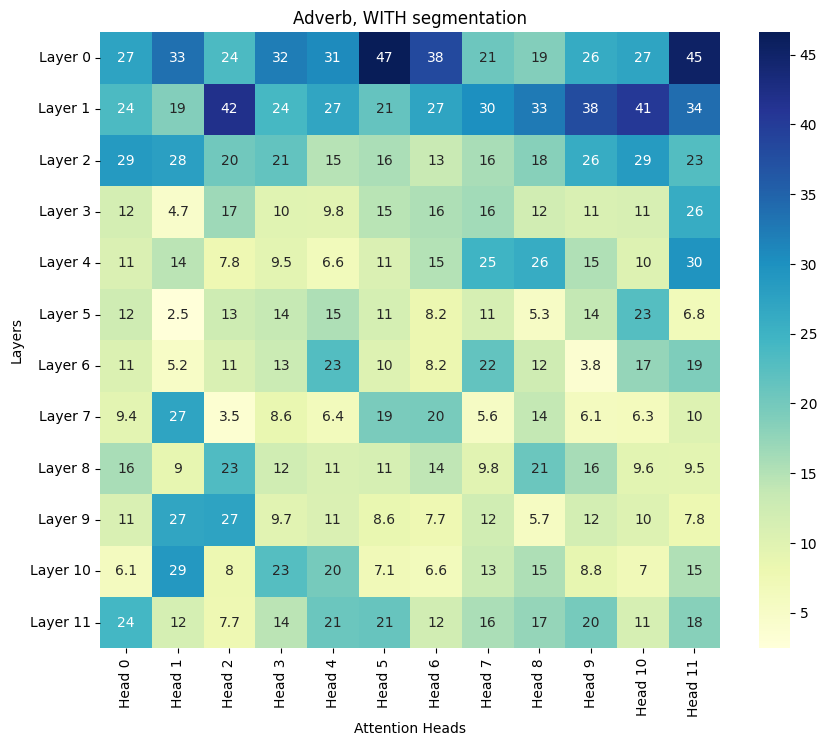

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life_w_context.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the pronouns (PRON) in the input story using spaCy
doc = nlp(story[143:])
pronouns = [token.text for token in doc if token.pos_ == 'ADV' and not token.is_punct]

# Print identified pronouns
print(f"Particle identified: {pronouns}")

# Add a space in front of each pronoun to match the tokenization
pronouns_with_space = [" " + pron for pron in pronouns]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of pronouns
token_positions = []

for pron in pronouns_with_space:
    tokenized_pron = tokenizer.tokenize(pron)
    found = False
    for i in range(len(tokens) - len(tokenized_pron) + 1):
        # Check if the tokenized pronoun matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_pron)] == tokenized_pron:
            token_positions.extend(range(i, i+len(tokenized_pron)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{pron}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No pronoun tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all pronoun tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all pronoun tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 210  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all pronouns
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])  # Apply the scale to the heatmap

plt.title(f"Adverb, WITH segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


Pronouns identified: ['through', 'heavily', 'rakishly', 'through', 'over', 'through', 'so', 'fast', 'too', 'fast', 'so', 'fast', 'grossly', 'up', 'up', 'again', 'back', 'all', 'any', 'longer', 'again', 'hastily', 'ahead', 'aimlessly', 'then', 'slowly', 'here']


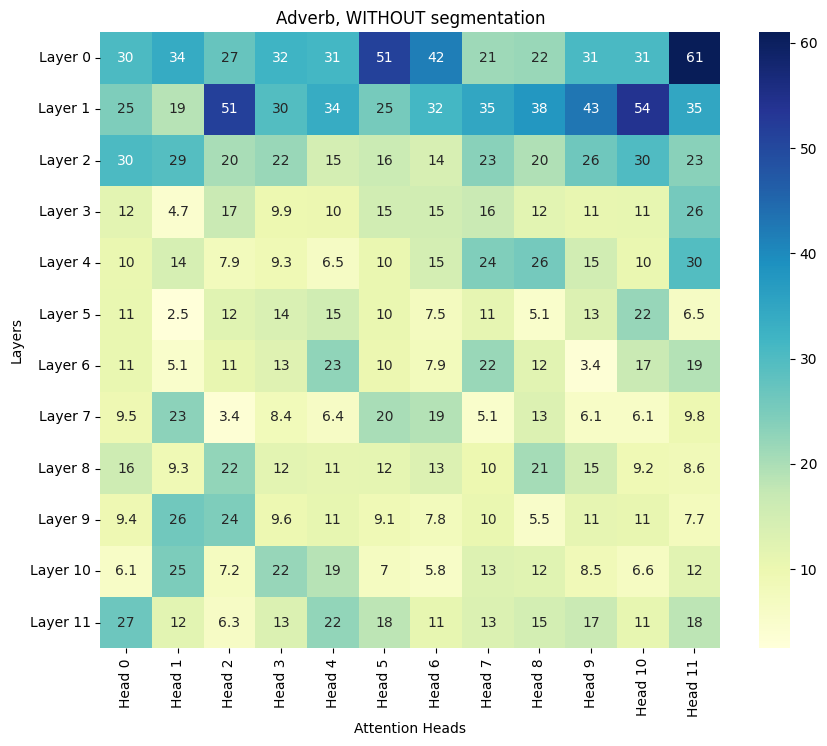

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import GPT2Tokenizer, GPT2Model
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True)

# Read the input story from a .txt file
file_path = '/Users/yuyangxu/Desktop/LLM_Prediction/text/secret_life.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    story = file.read()

# Identify all the pronouns (PRON) in the input story using spaCy
doc = nlp(story)
pronouns = [token.text for token in doc if token.pos_ == 'ADV' and not token.is_punct]

# Print identified pronouns
print(f"Pronouns identified: {pronouns}")

# Add a space in front of each pronoun to match the tokenization
pronouns_with_space = [" " + pron for pron in pronouns]

# Tokenize the input story
inputs = tokenizer(story, return_tensors="pt")
input_ids = inputs['input_ids']
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Tokenize the input text to find positions of pronouns
token_positions = []

for pron in pronouns_with_space:
    tokenized_pron = tokenizer.tokenize(pron)
    found = False
    for i in range(len(tokens) - len(tokenized_pron) + 1):
        # Check if the tokenized pronoun matches the tokens in the input_ids
        if tokens[i:i+len(tokenized_pron)] == tokenized_pron:
            token_positions.extend(range(i, i+len(tokenized_pron)))
            found = True
            break
    
    if not found:
        print(f"Warning: Token '{pron}' was not matched in the tokenized input.")

# Ensure there are token positions found
if not token_positions:
    raise ValueError("No pronoun tokens were found in the input story.")

# Get model output with attention
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # This is a tuple of attention layers

# Aggregate attention values for all pronoun tokens across all layers and heads
layers = len(attentions)
heads = attentions[0].size(1)
attention_values = np.zeros((layers, heads))

for layer in range(layers):
    for pos in token_positions:
        # Sum of attention directed to all pronoun tokens across all tokens in the sequence
        attention_values[layer] += attentions[layer][0, :, :, pos].sum(dim=-1).numpy()

# Define vmin and vmax for the heatmap scale
vmin = None  # Set a custom min value for the color scale, or leave as None for automatic scaling
vmax = 210  # Set a custom max value for the color scale, or leave as None for automatic scaling

# Plotting the aggregated attention heatmap for all pronouns
plt.figure(figsize=(10, 8))
sns.heatmap(attention_values, annot=True, cmap="YlGnBu", cbar=True, 
            xticklabels=[f'Head {i}' for i in range(heads)], 
            yticklabels=[f'Layer {i}' for i in range(layers)])  # Apply the scale to the heatmap

plt.title(f"Adverb, WITHOUT segmentation")
plt.xlabel("Attention Heads")
plt.ylabel("Layers")

plt.show()


In [130]:
## Test for sentence structure dependency
import spacy

# Load the spaCy model for English
nlp = spacy.load('en_core_web_sm')

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Process the sentence with spaCy
doc = nlp(sentence)

# Extract and print dependency relations
print(f"{'Word':<15}{'Dependency':<15}{'Head':<15}{'Children'}")
print("="*60)
for token in doc:
    # Print the token, its dependency relation, its head, and its children
    print(f"{token.text:<15}{token.dep_:<15}{token.head.text:<15}{[child.text for child in token.children]}")


Word           Dependency     Head           Children
The            det            fox            []
quick          amod           fox            []
brown          amod           fox            []
fox            nsubj          jumps          ['The', 'quick', 'brown']
jumps          ROOT           jumps          ['fox', 'over', '.']
over           prep           jumps          ['dog']
the            det            dog            []
lazy           amod           dog            []
dog            pobj           over           ['the', 'lazy']
.              punct          jumps          []
